In [1]:
#PERFORMING DATA CLEANING


In [2]:
import pandas as pd
import numpy as np
import os

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
#reading the data
df= pd.read_csv(r"C:\Users\HP\Downloads\Fraud.csv")


In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [10]:
#removing the duplicates if any
df = df.drop_duplicates()
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [11]:
#dropping the column 
df = df.drop(columns = "isFlaggedFraud")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [12]:
#checking for the null values
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [13]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [14]:
import seaborn as sns 

In [15]:
#checking the type 
df.type.dtype


dtype('O')

In [16]:
categoriacl=["type","nameOrig", "nameDest"]

In [17]:
numerical=["step", "amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]

<Axes: >

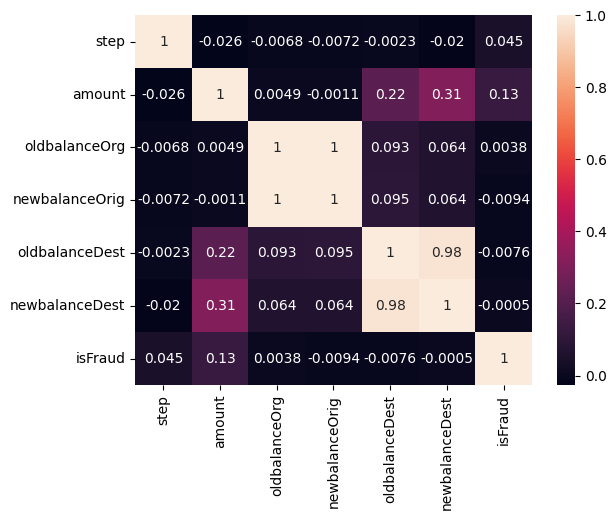

In [18]:
#managing the correaltion
sns.heatmap(df[numerical].corr(),annot=True)

In [19]:
!pip install tabulate


In [20]:
from tabulate import tabulate

In [21]:
#finding the minimun and maximum value for each field(column)
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |         0.1 |       1e+07 |
|  1 | oldbalanceOrg  |           0 |    3.89e+07 |
|  2 | newbalanceOrig |           0 |    3.89e+07 |
|  3 | oldbalanceDest |           0 |    4.21e+07 |
|  4 | isFraud        |           0 |           1 |


In [22]:
df['step'].value_counts()

step
19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: count, Length: 95, dtype: int64

In [23]:
df['nameOrig'].value_counts()

nameOrig
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: count, Length: 1048317, dtype: int64

In [24]:
df['nameDest'].value_counts()

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: count, Length: 449635, dtype: int64

Text(0, 0.5, 'Number of transactions')

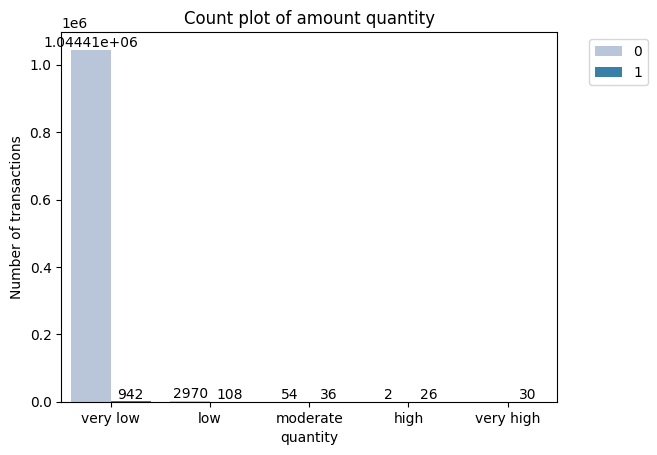

In [25]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

#All fraudulent transactions fall into the category of very low amounts.
#This suggests that in most cases, small transactions are more prone to fraudulent transactions.

In [26]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [27]:
df[numerical].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


In [28]:
corr_matrix = df[numerical].corr()

Text(0.5, 1.0, 'Correlation')

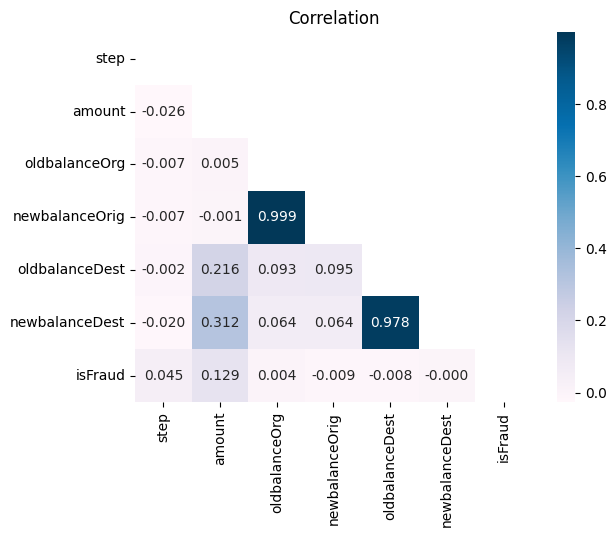

In [29]:

sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

oldbalanceOrg and newbalanceOrig has strong positive relationship.
oldbalanceDest and newbalanceDest has strong positive relationship.
oldbalanceOrg and amount has weak positive relationship.
newbalanceOrig and amount has moderate positive relationship.

In [30]:
#MODEL TRAINING

In [31]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [32]:
import random 
import tensorflow as tf

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.88      1.00      0.94    184806
    Fraud [1]       0.90      0.01      0.02     24909

     accuracy                           0.88    209715
    macro avg       0.89      0.50      0.48    209715
 weighted avg       0.88      0.88      0.83    209715
 



Text(0.5, 0, 'False Positive Rate')

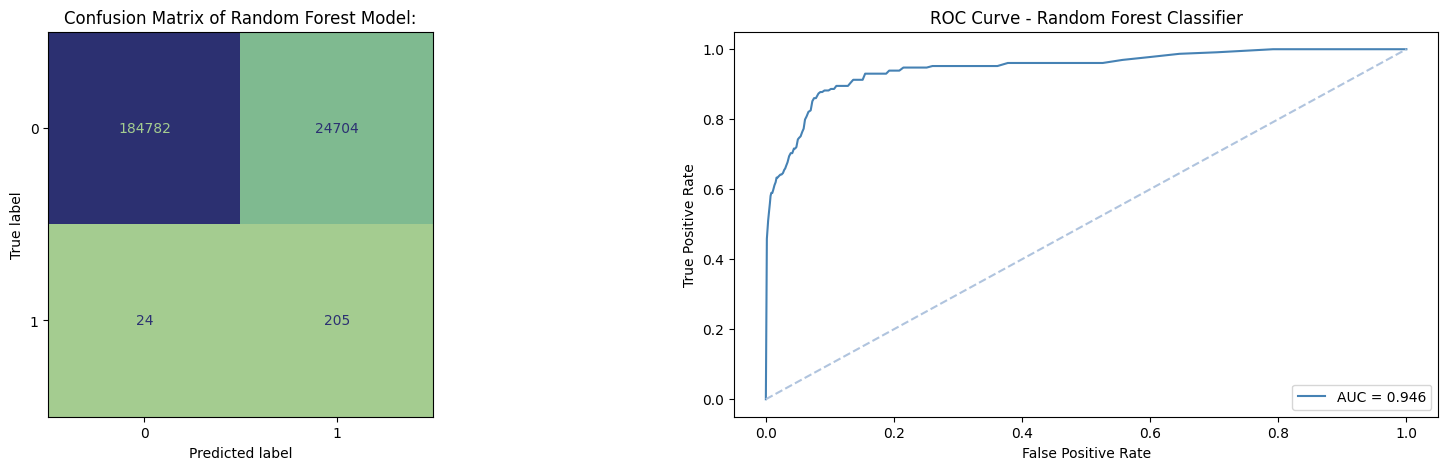

In [35]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

CONCLUSION

From the confusion matrix, 184782 were correctly classified as non-fraudulent payments, and 24704 people were misclassified as non-fraudulent payments.
According to the confusion matrix, 205 payments were incorrectly labelled as fraud while 24 payments were correctly identified as fraud.

The best performing model is Random Forest for identifying fraudulent and non-fraudulent payments as the AUC is 0.946, which is close to 1.